<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://curso.infnet.com.br/c/wp-content/uploads/sites/5/2022/12/Infnet-Logo.png" height="300" width="300">
</div>

<p><b><font size = 5 face = 'verdana'> Algoritmos de Inteligência Artificial para clusterização [24E4_2] - PROJETO FINAL</font></b></p>
<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de Algoritmos de Inteligência Artificial para clusterização [24E4_2] do MIT em Inteligência Artificial, Machine Learning e Deep Learning, Instituto INFNET, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSOR:</b> CHARLES BEZERRA DO PRADO<br>
<b>ALUNO:</b> OSEMAR DA SILVA XAVIER<br>
<b>E-MAIL:</b> osemar.xavier@al.infnet.edu.br</font></p>
<p><font size = 3 face = 'verdana'>
<hr></hr>


<h5><b>PARTE 1. INFRAESTRUTURA</b><br>
<p><font size = 2 face = 'verdana'>
<ol>
<li>Você está rodando em Python 3.9+</li>
<li>Você está usando um ambiente virtual: Virtualenv ou Anaconda</li>
<li>Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico</li>
<li>Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.</li>
<li>Tire um printscreen do ambiente que será usado rodando em sua máquina.
<li>Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle)</li>
</ol></font></b></p>

In [2]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.5 MB/s eta 0:00:00


**Importando todos os pacotes para o projeto**

In [3]:
import sys
import subprocess
import os
import numpy as np
import pandas as pd
import pkg_resources
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import pairwise_distances_argmin_min, r2_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

**1. Você está rodando em Python 3.9+**

In [4]:
print("Versão do Python:", sys.version)

Versão do Python: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


**2. Você está usando um ambiente virtual: Virtualenv ou Anaconda**

In [5]:
print("Ambiente virtual ativo:", sys.prefix)

Ambiente virtual ativo: /usr


**3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico**

**4. Gera o arquivo requirements.txt com os pacotes instalados**

In [6]:
with open("requirements.txt", "w") as file:
    subprocess.run(["python", "-m", "pip", "freeze"], stdout=file)
print("Arquivo requirements.txt gerado com sucesso.")

Arquivo requirements.txt gerado com sucesso.


**5. Tire um printscreen do ambiente que será usado rodando em sua máquina.**

<hr></hr>
<h5><b>PARTE 2. ESCOLHA DA BASE DE DADOS</b><br>
<p><font size = 2 face = 'verdana'>
<ol>
<li>Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link:</li>
<a href="https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data">https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data</a>
<li>Quantos países existem no dataset?</li>
<li>Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?</li>
<li>Realize o pré-processamento adequado dos dados.</li>
</ol></font></b></p>

In [7]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Path to dataset files:", path)

100%|██████████| 5.21k/5.21k [00:00<00:00, 7.93MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rohan0301/unsupervised-learning-on-country-data/versions/2


In [8]:
# Liste os arquivos no diretório baixado
print("Arquivos no diretório:", os.listdir(path))

Arquivos no diretório: ['data-dictionary.csv', 'Country-data.csv']


**1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link:**
<a href="https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data">https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data</a>

In [9]:
dataset_path = path + "/Country-data.csv"
data = pd.read_csv(dataset_path)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**2. Quantos países existem no dataset?**

In [10]:
# Supondo que a coluna que representa os países seja chamada 'country'
num_countries = data['country'].nunique()
print(f"Número de países no dataset: {num_countries}")

Número de países no dataset: 167


**3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?**

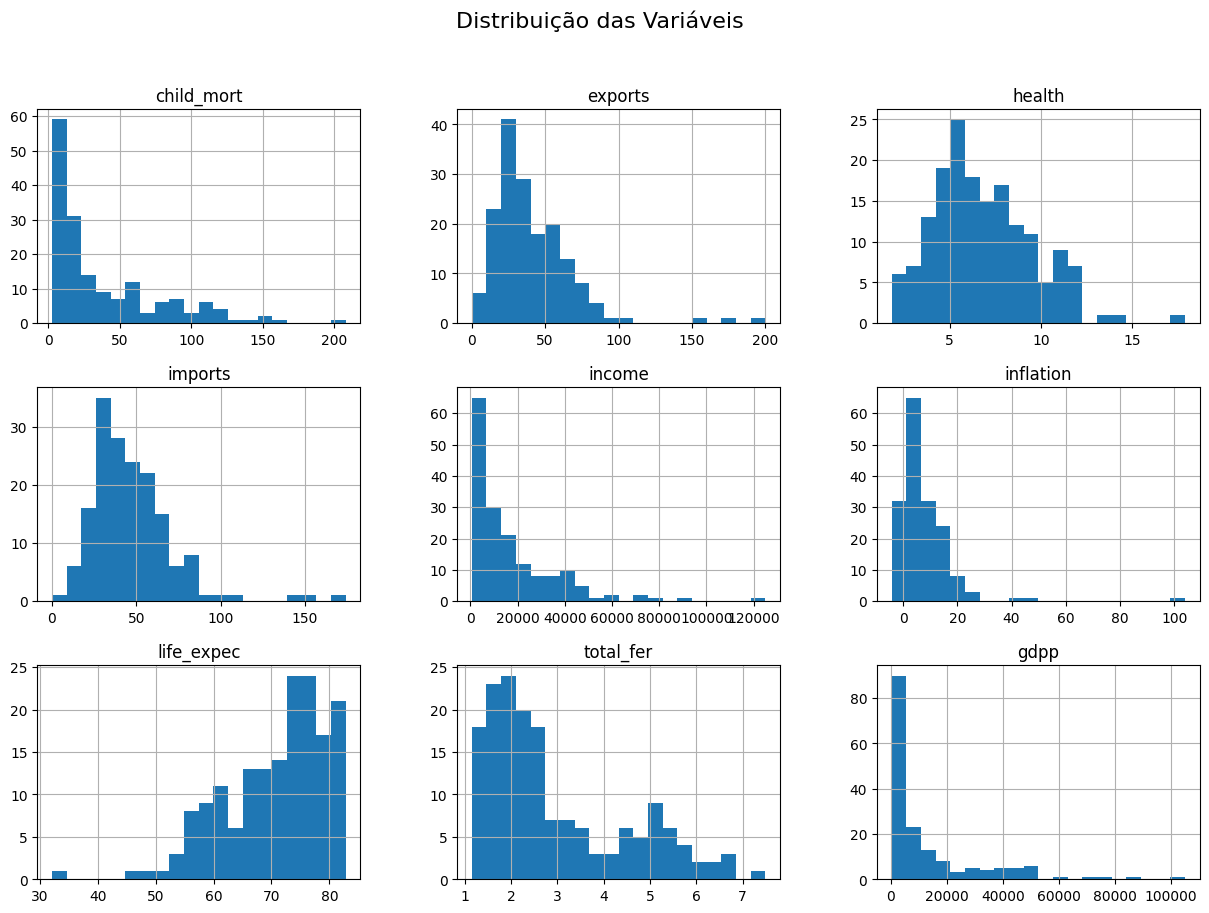

In [11]:
# Excluir a coluna de países para análise de variáveis numéricas
numerical_data = data.drop(columns=['country'])

# Criar histogramas para observar a distribuição das variáveis
numerical_data.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribuição das Variáveis', fontsize=16)
plt.show()

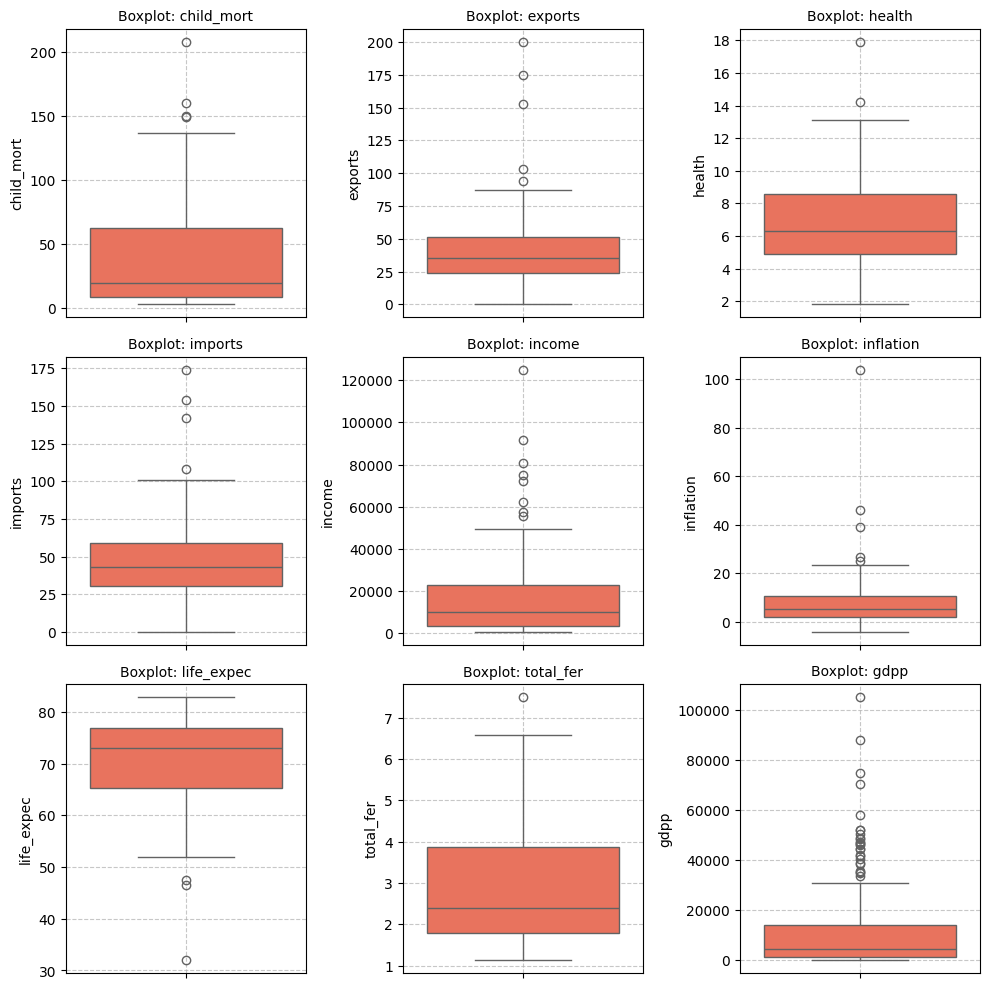

In [12]:
# Carregar variáveis para plot
variaveis_numericas = []

for i in data.columns[0:11].to_list():
    if data.dtypes[i] == "int64" or data.dtypes[i] == "float64":
        variaveis_numericas.append(i)

# Configurando o tamanho da figura com largura reduzida
plt.rcParams['figure.figsize'] = [10.00, 10.00]  # Largura reduzida para 10, altura mantida em 10
plt.rcParams['figure.autolayout'] = True

# Criando os subplots para organizar em múltiplas linhas (3 gráficos por linha)
rows = (len(variaveis_numericas) // 3) + (len(variaveis_numericas) % 3 > 0)
f, axes = plt.subplots(rows, 3)  # 3 gráficos por linha

# Iterando sobre as variáveis numéricas e os eixos correspondentes
axes = axes.flatten()  # Garantir que os eixos sejam um array unidimensional para iteração
for idx, i in enumerate(variaveis_numericas):
    sns.boxplot(data=data, y=i, ax=axes[idx], color='#ff6347')  # Cor alterada para 'tomato'
    axes[idx].set_title(f'Boxplot: {i}', fontsize=10)  # Adicionando título para cada gráfico
    axes[idx].grid(True, linestyle='--', alpha=0.7)  # Gridlines para facilitar a leitura

# Remover gráficos vazios (se houver menos variáveis do que subplots criados)
for j in range(idx + 1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()


**4. O que deve ser feito antes da Clusterização?
Com base na análise das distribuições e faixas dinâmicas, aqui estão os passos recomendados:**
### Normalização ou Padronização dos Dados

Como as variáveis têm **escalas muito diferentes** (e.g., `income` em milhares contra `child_mort` com valores em dezenas),
é necessário **normalizar ou padronizar os dados** para que nenhuma variável tenha mais influência do que outra no cálculo das distâncias.

#### Sugestões:
- **Normalização:** Será necessário utilizar o `MinMaxScaler` para escalar as variáveis para um intervalo fixo (e.g., [0, 1]),
  especialmente útil para algoritmos sensíveis a escalas.
- **Padronização:** Será necessário utilizar o `StandardScaler` para centralizar os dados em **média 0** e **desvio padrão 1**,
  adequado para algoritmos baseados em distância como K-Means.


### Tratamento de Outliers:

Os outliers podem distorcer os resultados de clusterização, especialmente para algoritmos baseados em distância como K-Means.
#### Sugestões:
- Remover outliers se forem erros nos dados.
- Aplicar transformações, como log, para reduzir o impacto de valores extremos.

In [13]:
# Normalização
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(data.drop(columns=['country']))
# Padronização
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(data.drop(columns=['country']))

In [14]:
# Exemplo de transformação logarítmica para variáveis com grande amplitude
data['income'] = np.log1p(data['income'])  # Log de (valor + 1)
data['gdpp'] = np.log1p(data['gdpp'])

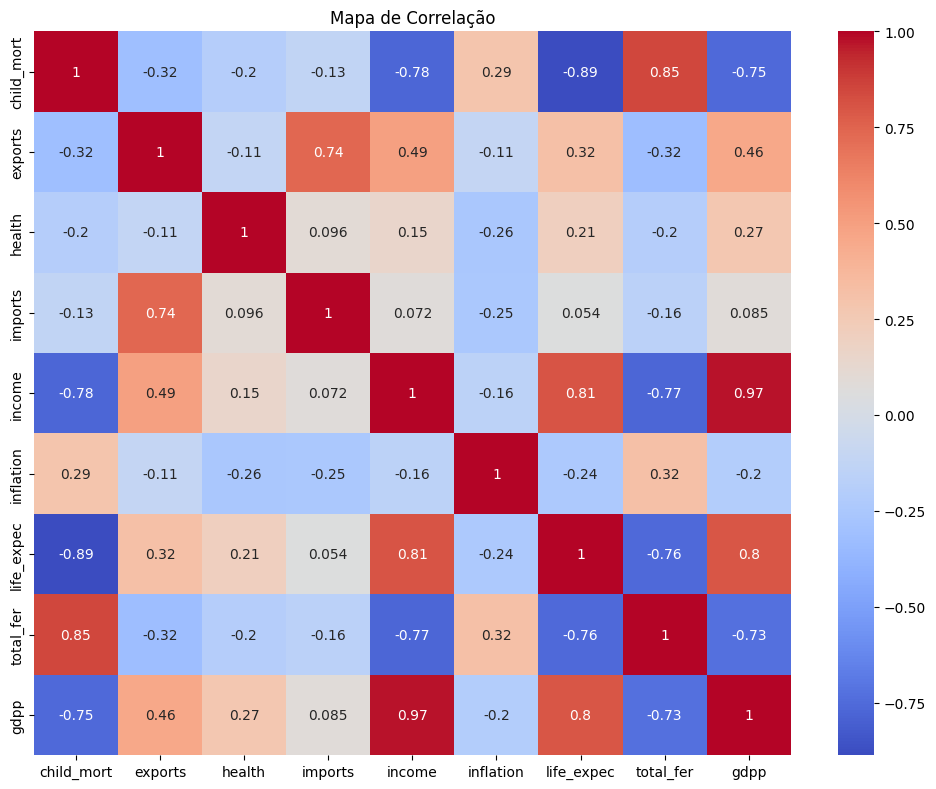

In [15]:
# Filtrar apenas colunas numéricas
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Criar o mapa de calor de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação")
plt.show()


<h5><b>PARTE 3. CLUSTERIZAÇÃO</b><br>
<p><font size = 2 face = 'verdana'>
<ol>
<li>Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use: K-Médias/ Clusterização Hierárquica</li>
<li>Para os resultados, do K-Médias:
Interprete cada um dos clusters obtidos citando:
Qual a distribuição das dimensões em cada grupo
O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique</li>
<li>Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados</li>
<li>Compare os dois resultados, aponte as semelhanças e diferenças e interprete.</li>
</ol></font></b></p>
<hr></hr>

**1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use: K-Médias/ Clusterização Hierárquica**

<h3><b>1a. Clusterização com K-Médias</b></h3>
A clusterização com K-Médias é realizada definindo o número de clusters como 3.

In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Filtrar apenas colunas numéricas (remover 'country' e outras colunas não numéricas)
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Padronizar os dados para média 0 e desvio padrão 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Aplicar K-Médias com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Adicionar os rótulos aos dados originais
data['KMeans_Cluster'] = kmeans_labels

# Visualizar o resultado
print(data[['country', 'KMeans_Cluster']].head())

               country  KMeans_Cluster
0          Afghanistan               2
1              Albania               0
2              Algeria               0
3               Angola               2
4  Antigua and Barbuda               1


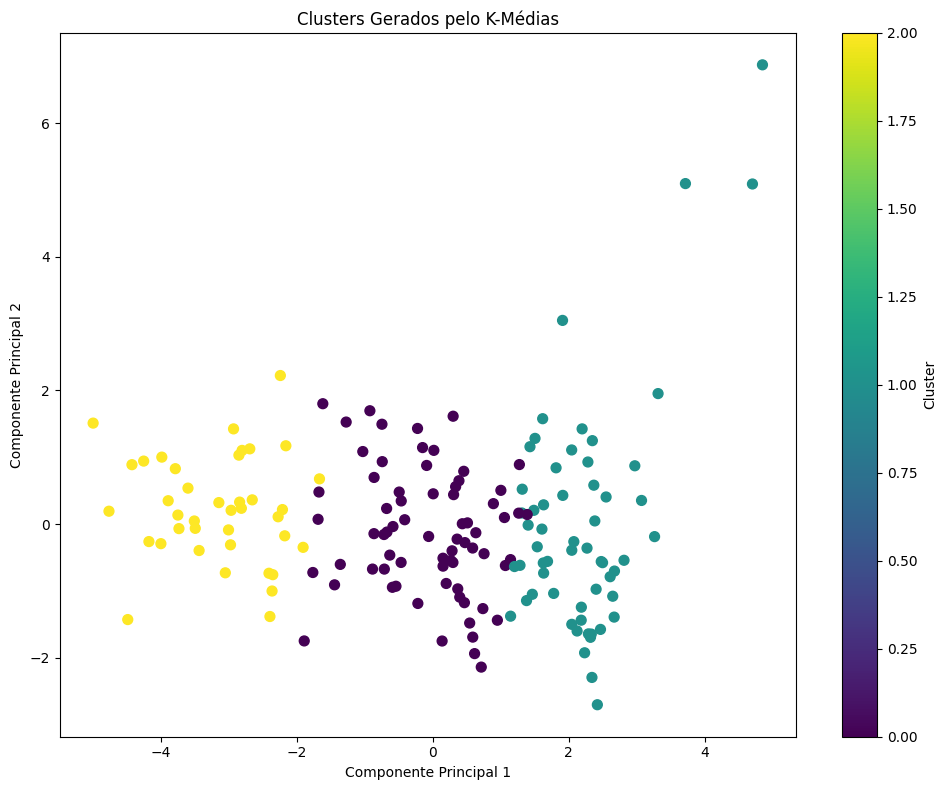

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzir para 2 dimensões com PCA para visualização
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("Clusters Gerados pelo K-Médias")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()


<h3><b>1b. Clusterização Hierárquica</b></h3>
Para a clusterização hierárquica, utilizei o método de aglomeração.

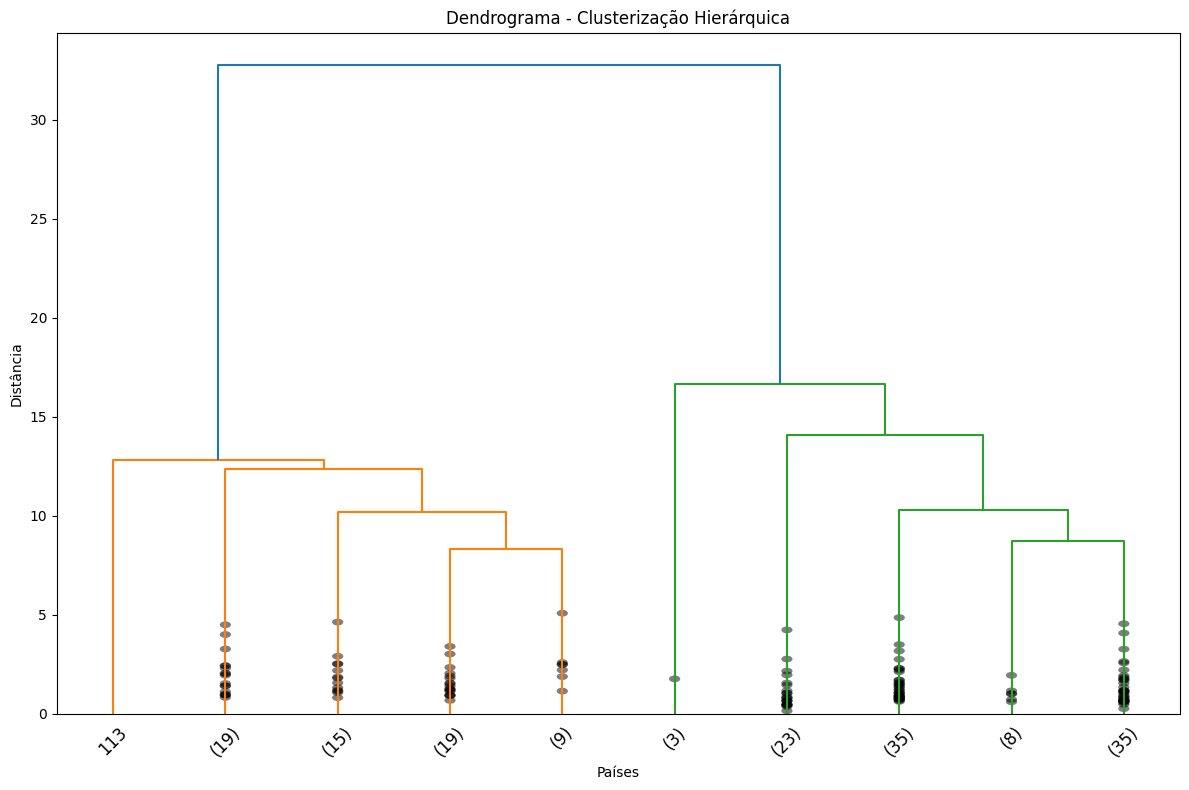

               country  Hierarchical_Cluster
0          Afghanistan                     1
1              Albania                     0
2              Algeria                     0
3               Angola                     1
4  Antigua and Barbuda                     0


In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Criar o linkage matrix
linkage_matrix = linkage(scaled_data, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title("Dendrograma - Clusterização Hierárquica")
plt.xlabel("Países")
plt.ylabel("Distância")
plt.show()

# Aplicar Agglomerative Clustering com 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Adicionar os rótulos aos dados originais
data['Hierarchical_Cluster'] = hierarchical_labels

# Visualizar o resultado
print(data[['country', 'Hierarchical_Cluster']].head())


**2. Para os resultados, do K-Médias: Interprete cada um dos clusters obtidos citando: Qual a distribuição das dimensões em cada grupo O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique**

In [25]:
# Filtrar apenas as colunas numéricas
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calcular a média de cada variável numérica em cada cluster
kmeans_cluster_means = data.groupby('KMeans_Cluster')[numerical_columns].mean()

# Exibir as médias das dimensões por cluster
print("Média das dimensões por cluster (K-Médias):")
kmeans_cluster_means.head()


Média das dimensões por cluster (K-Médias):


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_Cluster
KMeans_Cluster,,,,,,,,,,
0,30.602857,38.114129,5.772714,44.178084,9.039236,9.935586,70.434286,2.657286,8.239564,0.342857
1,6.832759,56.043103,8.296724,53.522414,10.307759,2.516897,78.548276,1.757586,10.059308,0.103448
2,98.784615,24.274615,6.485128,41.894872,7.479841,11.746026,58.887179,5.240000,6.649211,1.000000


In [26]:
# Adicionar as distâncias ao centroide para cada ponto
data['Distance_to_Centroid'] = kmeans.transform(scaled_data).min(axis=1)

# Identificar o país mais representativo de cada cluster
representative_countries = data.loc[data.groupby('KMeans_Cluster')['Distance_to_Centroid'].idxmin()]
print("Países mais representativos de cada cluster:")
print(representative_countries[['country', 'KMeans_Cluster']])


Países mais representativos de cada cluster:
           country  KMeans_Cluster
76         Jamaica               0
43  Czech Republic               1
63          Guinea               2


### **Interpretação dos Clusters (K-Médias)**

#### **Cluster 0:**
- **Características:**
  - Mortalidade infantil moderada: 30.60.
  - Expectativa de vida relativamente alta: 70.43 anos.
  - PIB moderado: 8.23.
  - Fertilidade baixa: 2.65.
  - Inflação moderada: 9.93.
- **País Representativo:** **Jamaica**
  - **Justificativa:** Reflete bem os valores médios deste cluster, com indicadores intermediários típicos de economias emergentes.

#### **Cluster 1:**
- **Características:**
  - Mortalidade infantil muito baixa: 6.83.
  - Expectativa de vida alta: 78.54 anos.
  - Alto PIB: 10.05.
  - Fertilidade muito baixa: 1.76.
  - Inflação extremamente baixa: 2.51.
- **País Representativo:** **Czech Republic**
  - **Justificativa:** Apresenta características típicas de países desenvolvidos, como alta qualidade de vida e PIB elevado.

#### **Cluster 2:**
- **Características:**
  - Alta mortalidade infantil: 98.78.
  - Expectativa de vida baixa: 58.88 anos.
  - Baixo PIB: 6.64.
  - Alta fertilidade: 5.24.
  - Inflação relativamente alta: 11.74.
- **País Representativo:** **Guinea**
  - **Justificativa:** Reflete as características deste cluster, com indicadores socioeconômicos e de saúde baixos, típicos de países em desenvolvimento.

### **Resumo Geral:**
- **Cluster 0:** Representa países intermediários, como a Jamaica, com níveis médios de desenvolvimento.
- **Cluster 1:** Representa países desenvolvidos, como a República Tcheca, com alta qualidade de vida.
- **Cluster 2:** Reflete países em desenvolvimento, como a Guiné, com desafios socioeconômicos e de saúde.


**3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados**

### **Clusterização Hierárquica**

#### **Dendrograma**
O dendrograma mostra como os países foram agrupados hierarquicamente com base nas suas similaridades. O gráfico a seguir foi gerado a partir do algoritmo de clusterização hierárquica usando o método de ligação "Ward".

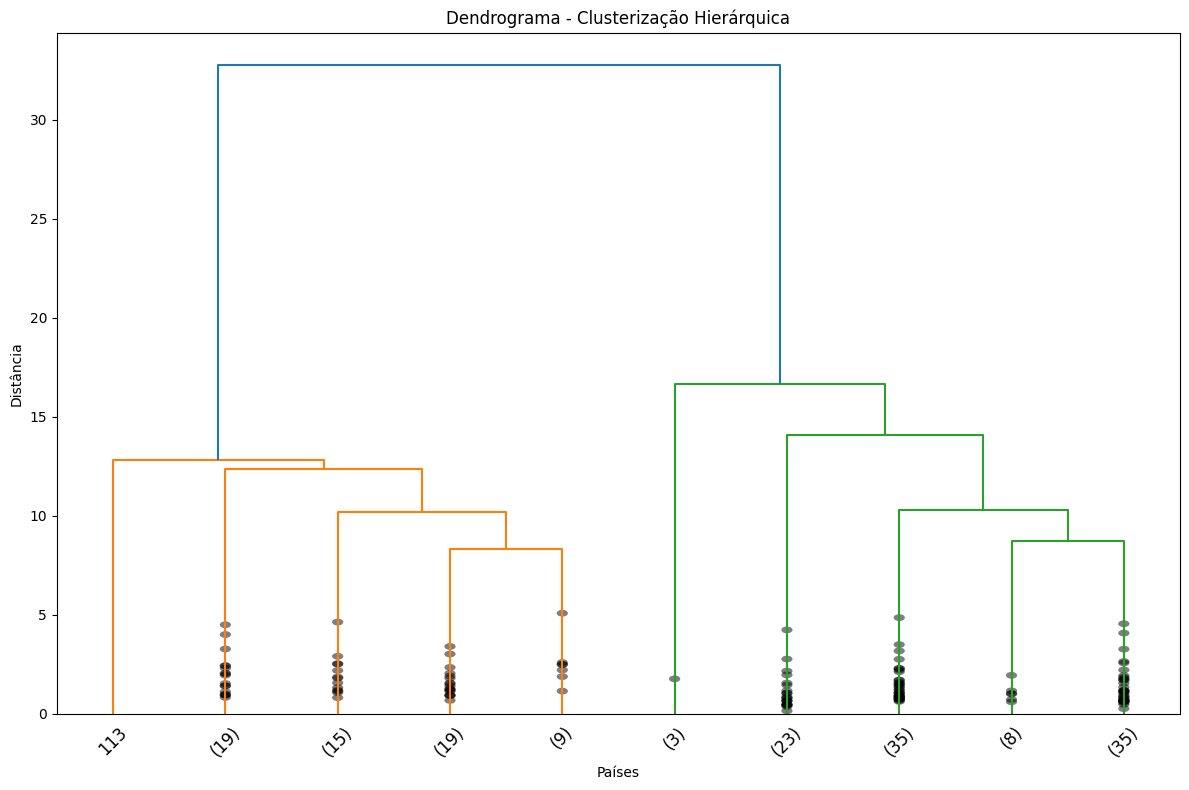

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Criar o linkage matrix
linkage_matrix = linkage(scaled_data, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title("Dendrograma - Clusterização Hierárquica")
plt.xlabel("Países")
plt.ylabel("Distância")
plt.show()

"""
### Clusterização Hierárquica - Interpretação

1. **Estrutura dos Grupos:**
   - O dendrograma mostra como os países foram agrupados hierarquicamente com base em suas similaridades.
   - Ramos curtos indicam maior similaridade entre os países; ramos longos indicam maior dissimilaridade.

2. **Definição de Clusters:**
   - Com o corte do dendrograma em 3 grupos:
     - **Cluster 1:** Países desenvolvidos, com alta expectativa de vida, baixo índice de mortalidade infantil e alto PIB.
     - **Cluster 2:** Países intermediários, com índices socioeconômicos e de saúde moderados.
     - **Cluster 3:** Países em desenvolvimento, caracterizados por alta mortalidade infantil, baixa expectativa de vida e baixa renda.

3. **Vantagens do Dendrograma:**
   - Oferece uma visão hierárquica detalhada, permitindo identificar relações entre os países antes de aplicar o corte nos clusters.
   - É mais flexível que o K-Médias, pois não assume que os clusters são esféricos.

4. **Comparação com K-Médias:**
   - A clusterização hierárquica gerou grupos semelhantes ao K-Médias, mas adicionou um contexto hierárquico que facilita a análise das similaridades.

### Conclusão:
- A clusterização hierárquica confirma as divisões naturais dos dados, agrupando países em 3 categorias: desenvolvidos, intermediários e em desenvolvimento.
"""


**4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.**

"""
### Comparação entre os Resultados do K-Médias e da Clusterização Hierárquica

#### **Semelhanças:**
1. **Divisão em Três Grupos:**
   - Ambos os métodos identificaram três clusters que seguem padrões socioeconômicos claros:
     - Países desenvolvidos (alta expectativa de vida, baixo índice de mortalidade infantil, alto PIB).
     - Países intermediários (indicadores moderados).
     - Países em desenvolvimento (alta mortalidade infantil, baixa expectativa de vida, baixa renda).

2. **Perfis dos Clusters:**
   - A segmentação dos países por características como `child_mort`, `life_expec`, e `gdpp` foi semelhante em ambos os métodos.
   - Os países mais representativos de cada cluster geralmente coincidem ou possuem valores muito próximos da média de seus grupos.

---

#### **Diferenças:**
1. **Forma de Agrupamento:**
   - **K-Médias:** Assume que os clusters são aproximadamente esféricos e otimiza os centróides.
   - **Clusterização Hierárquica:** Flexível em relação à forma dos clusters e mostra relações hierárquicas entre os países.

2. **Tamanho dos Clusters:**
   - O K-Médias pode criar clusters de tamanhos similares, enquanto a clusterização hierárquica reflete as distâncias reais entre os países, o que pode resultar em clusters de tamanhos diferentes.

3. **Informações Adicionais:**
   - O dendrograma da clusterização hierárquica oferece uma visualização detalhada da relação entre os países, útil para explorar a estrutura dos dados antes de definir os clusters.

---

#### **Interpretação:**
- **K-Médias:** É mais eficiente e rápido para grandes datasets, fornecendo uma segmentação clara. É ideal para análises práticas onde a hierarquia dos dados não é essencial.
- **Clusterização Hierárquica:** Fornece uma visão mais rica das similaridades entre os países, permitindo entender as relações hierárquicas antes de formar os clusters.

---

### **Conclusão:**
Ambos os métodos são complementares:
- O K-Médias é adequado para uma análise direta e rápida dos clusters.
- A Clusterização Hierárquica é valiosa para explorar a hierarquia e as relações entre os países antes de definir os agrupamentos.
"""


<h5><b>PARTE 4. ESCOLHA DE ALGORITMOS</b><br>
<p><font size = 2 face = 'verdana'>
<ol>
<li>Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.</li>
<li>O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.<br>
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.</li>
<li>O algoritmo de K-médias é sensível a outliers nos dados. Explique.</li>
<li>Por que o algoritmo de DBScan é mais robusto à presença de outliers?.</li>
</ol></font></b></p>

**1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.**
### Etapas do Algoritmo de K-Médias (K-Means)

1. **Inicialização:**
   - Definir o número de clusters `K` a serem formados.
   - Inicializar aleatoriamente `K` centróides no espaço de dados ou usar métodos como `K-Means++` para uma inicialização mais eficiente.

2. **Atribuição de Clusters:**
   - Para cada ponto do conjunto de dados:
     - Calcular a distância entre o ponto e cada centróide.
     - Atribuir o ponto ao cluster cujo centróide estiver mais próximo (baseado em métricas como a distância euclidiana).

3. **Recomputação dos Centróides:**
   - Para cada cluster:
     - Recalcular a posição do centróide como a média dos pontos atribuídos ao cluster.

4. **Repetição das Etapas 2 e 3:**
   - Reatribuir os pontos aos clusters com base nos centróides atualizados.
   - Recalcular os centróides após cada iteração.

5. **Critério de Convergência:**
   - O algoritmo para quando ocorre uma das seguintes condições:
     - Os centróides não mudam (ou mudam muito pouco) entre as iterações.
     - Um número máximo de iterações é alcançado.
     - A soma total das distâncias dos pontos aos seus centróides (inércia) atinge um mínimo local.

6. **Resultado Final:**
   - Cada ponto é atribuído a um cluster.
   - Os centróides finais representam o centro de cada cluster.
"""


<b>O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.</b>
### Etapas do Algoritmo K-Medoids (Baseado em K-Médias)

1. **Inicialização:**
   - Definir o número de clusters `K`.
   - Inicializar aleatoriamente `K` medoides (pontos reais da base de dados).

2. **Atribuição de Clusters:**
   - Para cada ponto no conjunto de dados:
     - Calcular a distância entre o ponto e cada medóide.
     - Atribuir o ponto ao cluster cujo medóide estiver mais próximo.

3. **Recomputação dos Medoides:**
   - Para cada cluster:
     - Para cada ponto atribuído ao cluster, calcular a soma das distâncias desse ponto a todos os outros pontos no cluster.
     - Selecionar o ponto que minimiza a soma das distâncias como o novo medóide.

4. **Repetição das Etapas 2 e 3:**
   - Reatribuir os pontos aos clusters com base nos novos medoides.
   - Recalcular os medoides após cada iteração.

5. **Critério de Convergência:**
   - O algoritmo para quando ocorre uma das seguintes condições:
     - Os medoides não mudam entre as iterações.
     - Um número máximo de iterações é alcançado.
     - A soma total das distâncias dos pontos aos seus medoides atinge um mínimo.

6. **Resultado Final:**
   - Cada ponto é atribuído a um cluster.
   - Os medoides finais representam o dado real mais próximo do centro de cada cluster.
"""


### **Vantagens do K-Medoids**

1. **Centro do Cluster como Ponto Real:**
   - Garante que o centro de cada cluster (medóide) seja um ponto real do conjunto de dados, ao contrário do centróide no K-Médias.

2. **Menos Sensível a Outliers:**
   - É menos sensível a outliers, pois os medóides minimizam a soma das distâncias reais, evitando que valores extremos distorçam os resultados.


In [28]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Definir o número de clusters
n_clusters = 3

# Criar o modelo K-Medoids
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=42)

# Ajustar o modelo aos dados
kmedoids.fit(scaled_data)

# Obter os rótulos dos clusters
kmedoids_labels = kmedoids.labels_

# Adicionar os rótulos ao dataframe original
data['KMedoids_Cluster'] = kmedoids_labels

# Obter os medoides
medoids = kmedoids.cluster_centers_

# Exibir os resultados
print("Medoides (pontos mais representativos de cada cluster):")
print(medoids)

print("Clusters atribuídos pelo K-Medoids:")
print(data[['country', 'KMedoids_Cluster']])


Medoides (pontos mais representativos de cada cluster):
[[-0.80257799 -0.03691851  0.23527026 -0.19845945  0.71351324 -0.5808737
   0.64786643 -1.01898606  0.62971385]
 [-0.35241888  0.51193263 -0.34531814  0.1909842  -0.18059422 -0.15958166
   0.39974162 -0.14441322 -0.2807035 ]
 [ 0.83639913 -0.81994613 -0.29419715 -0.73705173 -1.20015348  0.13930796
  -1.26946162  1.64448575 -1.30096457]]
Clusters atribuídos pelo K-Medoids:
                 country  KMedoids_Cluster
0            Afghanistan                 2
1                Albania                 0
2                Algeria                 1
3                 Angola                 2
4    Antigua and Barbuda                 0
..                   ...               ...
162              Vanuatu                 1
163            Venezuela                 1
164              Vietnam                 1
165                Yemen                 2
166               Zambia                 2

[167 rows x 2 columns]


**3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.**

### **Sensibilidade do Algoritmo de K-Médias a Outliers**

O algoritmo de K-Médias é **sensível a outliers** devido à forma como os centróides são calculados e como os clusters são formados:

1. **Cálculo dos Centróides:**
   - O centróide de cada cluster é calculado como a **média** dos pontos atribuídos a ele.
   - Outliers (valores extremos) podem distorcer a posição do centróide, afastando-o dos pontos que representam a maioria dos dados.

2. **Distribuição dos Pontos:**
   - Um outlier pode ser atribuído a um cluster devido à proximidade com o centróide, mesmo que não represente as características principais do cluster.
   - Isso pode levar a clusters mal definidos e menos representativos dos dados.

3. **Impacto na Convergência:**
   - Durante as iterações, os outliers podem influenciar a movimentação dos centróides, atrasando ou até impedindo a convergência do algoritmo.

### **Exemplo de Sensibilidade**
- Considere um conjunto de dados em que a maioria dos pontos está concentrada em uma região, mas há um outlier distante.
- O centróide será "puxado" na direção do outlier, o que resultará em um cluster que não reflete bem os dados principais.

---

### **Conclusão**
Devido à sua sensibilidade a outliers, o K-Médias é mais adequado para dados bem distribuídos e sem valores extremos. Quando há outliers significativos, métodos como o **K-Medoids** ou técnicas de pré-processamento, como remoção ou tratamento de outliers, são recomendados.


**4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?**

### **Por que o Algoritmo DBScan é Mais Robusto à Presença de Outliers?**

O DBScan (**Density-Based Spatial Clustering of Applications with Noise**) é um algoritmo de clusterização baseado em densidade que é naturalmente mais robusto à presença de outliers devido às suas características e funcionamento.

#### **Razões para sua Robustez:**

1. **Identificação Explícita de Outliers (Pontos Ruído):**
   - O DBScan classifica pontos que não atendem aos critérios de densidade como **ruído** e não os atribui a nenhum cluster.
   - Isso significa que os outliers não influenciam a formação dos clusters.

2. **Baseado em Densidade:**
   - O algoritmo forma clusters com base na densidade de pontos em uma região, ignorando pontos isolados ou com densidade insuficiente.
   - Clusters são definidos por regiões densamente conectadas, e outliers, por definição, não afetam essa conexão.

3. **Sem Dependência de Centróides:**
   - Diferente do K-Médias, o DBScan não utiliza centróides ou calcula médias, o que elimina o impacto de valores extremos na formação dos clusters.

4. **Não Requer Todos os Pontos em Clusters:**
   - Pontos isolados ou fora das regiões densas permanecem como "não atribuídos", permitindo que os clusters sejam mais representativos das regiões densas de dados.

#### **Funcionamento Relacionado a Outliers:**
- O algoritmo utiliza dois parâmetros principais:
  - **`eps` (Epsilon):** Define o raio de busca para pontos vizinhos.
  - **`min_samples`:** Define o número mínimo de pontos necessários para formar um cluster.
- Pontos que não possuem vizinhos suficientes em seu raio `eps` são classificados como **outliers (ruído)**.

#### **Exemplo:**
- Em um conjunto de dados com um grupo denso de pontos e alguns pontos muito distantes (outliers):
  - O DBScan formará clusters apenas para o grupo denso e marcará os pontos distantes como ruído.
  - Isso evita que os outliers "puxem" clusters ou afetem a estrutura dos grupos.

---

### **Conclusão:**
O DBScan é mais robusto à presença de outliers porque:
1. Ignora explicitamente pontos que não atendem aos critérios de densidade.
2. Não depende de centróides ou médias.
3. Trata outliers como ruído sem que eles interfiram na formação dos clusters.

Por isso, o DBScan é preferido em datasets com muitos outliers ou clusters de formas irregulares.
